In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from net_visualiser import DrawNN

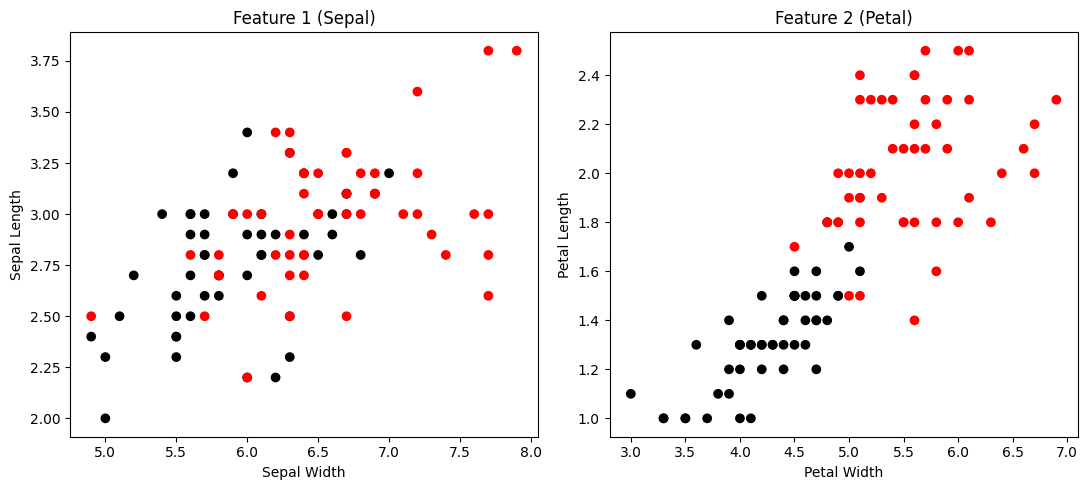

In [2]:
# Load and split the data
# sepal width, sepal length, petal width, petal length
X = np.loadtxt("/Users/jackarnott/git/Scientific-Computing-Case-Study/Flower Classifier/iris_data.csv", delimiter=',')
y = np.loadtxt("/Users/jackarnott/git/Scientific-Computing-Case-Study/Flower Classifier/iris_types.csv",dtype=int, delimiter=',')
y[y == 2] = 0
y = np.reshape(y,(100,1))
full_data = np.concatenate((X,y),axis = 1)
col = np.where(full_data[:,4]==1,'k','r')
fig, ax = plt.subplots(1,2,figsize = (11,5))
ax[0].scatter(full_data[:,0],full_data[:,1],c = col)
ax[0].set_xlabel("Sepal Width")
ax[0].set_ylabel("Sepal Length")
ax[0].set_title("Feature 1 (Sepal)")
ax[1].scatter(full_data[:,2],full_data[:,3],c = col)
ax[1].set_title("Feature 2 (Petal)")
ax[1].set_xlabel("Petal Width")
ax[1].set_ylabel("Petal Length")
plt.tight_layout()
plt.show()

In [3]:
# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


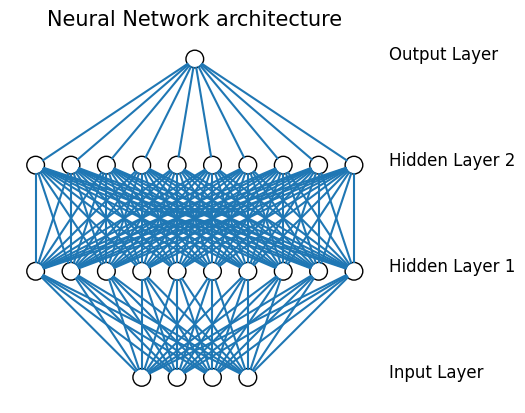

In [ ]:
# build the Model with two hidden Layers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=4,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,  activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))  # 1 neuron with sigmoid activation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
DrawNN([4,10,10,1]).draw()

In [5]:
# Train the model and report accuracy
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=300,verbose=0)
accuracy = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0945


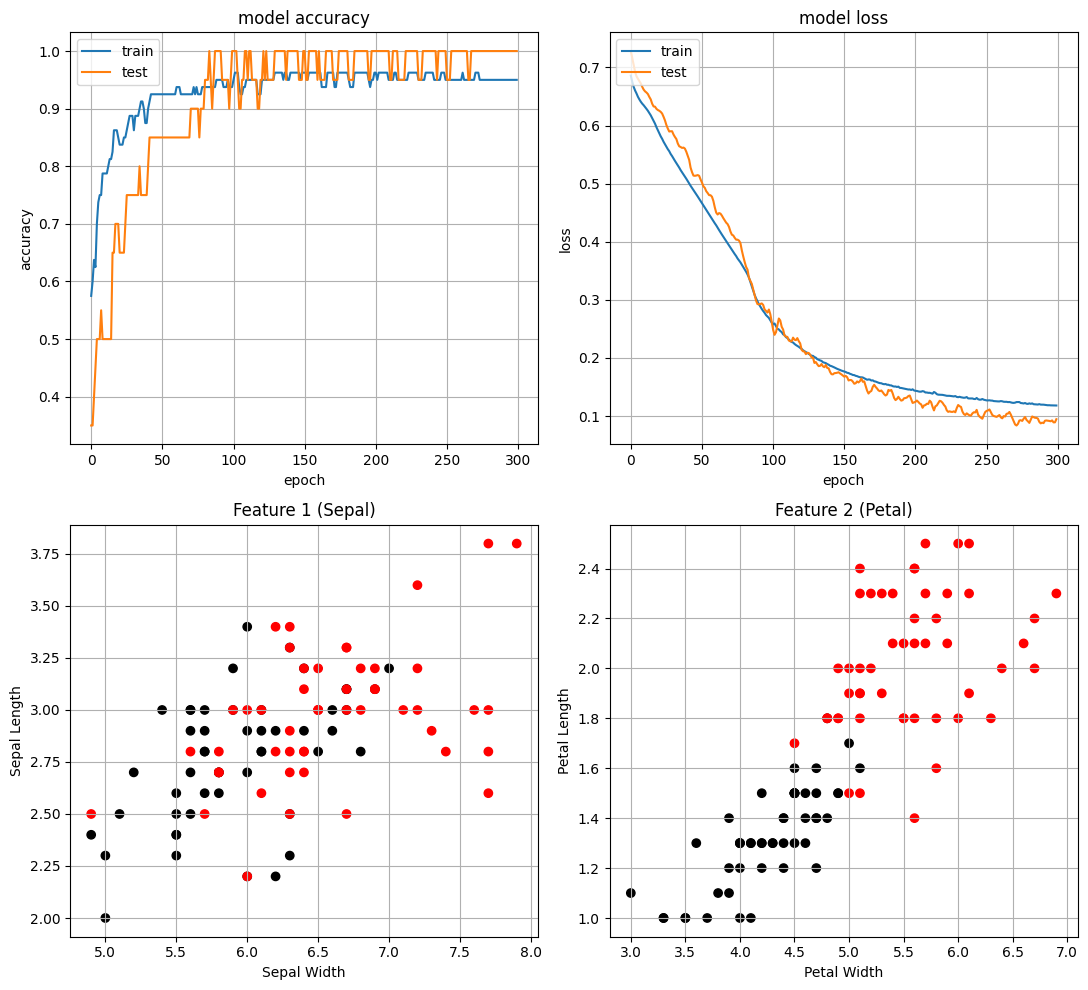

In [6]:
# Plot accuracy, loss and descision boundary
fig, ax = plt.subplots(2,2,figsize = (11,10))
ax[0,0].plot(history.history['accuracy'])
ax[0,0].plot(history.history['val_accuracy'])
ax[0,0].set_title('model accuracy')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_xlabel('epoch')
ax[0,0].legend(['train', 'test'], loc='upper left')
ax[0,0].grid()
ax[0,1].plot(history.history['loss'])
ax[0,1].plot(history.history['val_loss'])
ax[0,1].set_title('model loss')
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')
ax[0,1].legend(['train', 'test'], loc='upper left')
ax[0,1].grid()
ax[1,0].scatter(full_data[:,0],full_data[:,1],c = col)
ax[1,0].set_xlabel("Sepal Width")
ax[1,0].set_ylabel("Sepal Length")
ax[1,0].set_title("Feature 1 (Sepal)")
ax[1,0].grid()
ax[1,1].scatter(full_data[:,2],full_data[:,3],c = col)
ax[1,1].set_title("Feature 2 (Petal)")
ax[1,1].set_xlabel("Petal Width")
ax[1,1].set_ylabel("Petal Length")
ax[1,1].grid()
plt.tight_layout()
plt.show()

### Improvements
- Boosting
